In [13]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [14]:
import math
from tkinter import*
from time import time
from PIL import Image, ImageTk
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd 
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import sklearn.model_selection as model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [15]:
cid = "3084b278d0a74e879edacecb9e57f1ff"
secret = "d950e13a6cf747959252dc5bbb0b930f"
#Authentication - Spotify Developer Account
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [16]:
def analyze_playlist(creator, playlist_id, genre_type):
    
    # Creating an empty dataframe
    playlist_features_list = ["genre","artist","album","track_name",  "track_id","acousticness", "danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"] 
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Looping through every track in the playlist, extracting features and appending them to the playlist df

    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        playlist_features["genre"] =genre_type
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[5:8]:
            playlist_features[feature] = audio_features[feature]*1000 
        
        for feature in playlist_features_list[8:]:
            playlist_features[feature] = audio_features[feature]

        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    return playlist_df

In [17]:
#playlist
playlist_creator = "spotify"
playlist_id = "4oBAlPMMM8HqTd9ee6GiRr"
genre_type="electro"
playlist_electro=analyze_playlist(playlist_creator, playlist_id,genre_type)


playlist_creator = "spotify"
playlist_id = "37i9dQZF1DWWJOmJ7nRx0C"
genre_type="rock"
playlist_rock=analyze_playlist(playlist_creator, playlist_id,genre_type)

playlist_creator = "spotify"
playlist_id = "7qACZGMjyo64TdUdKAegjp"
genre_type="blues"
playlist_blues=analyze_playlist(playlist_creator, playlist_id,genre_type)

playlist_creator = "spotify"
playlist_id = "3HYK6ri0GkvRcM6GkKh0hJ"
genre_type="classical"
playlist_classical=analyze_playlist(playlist_creator, playlist_id,genre_type)

playlist_creator = "spotify"
playlist_id = "37i9dQZF1DX52ln8eMkne9"
genre_type="jazz"
playlist_jazz=analyze_playlist(playlist_creator, playlist_id,genre_type)

playlist_creator = "spotify"
playlist_id = "6MXkE0uYF4XwU4VTtyrpfP"
genre_type="hiphop"
playlist_hiphop=analyze_playlist(playlist_creator, playlist_id,genre_type)

final_df = pd.concat([playlist_classical, playlist_jazz,playlist_rock,playlist_electro,playlist_hiphop, playlist_blues],ignore_index=True, axis=0)
final_df

,genre,artist,album,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,classical,Johann Sebastian Bach,"Bach: The Goldberg Variations, BWV 988 (1981 G...","Goldberg Variations, BWV 988: Aria",5bu9A6uphPWg39RC3ZKeku,995.0,454.0,13.9,4,-29.966,0,0.0514,0.943,0.0736,0.244,130.253,184853,4
1,classical,George Frideric Handel,Handel Sarabande,Handel / Orch. Hale: Keyboard Suite No. 4 in D...,1upQiytDIEZfl9ItruoXuC,927.0,93.9,33.6,2,-24.041,0,0.0606,0.83,0.0954,0.0516,67.359,207267,3
2,classical,Joseph Haydn,Haydn: Cello Concertos (Remastered),"Cello Concerto No. 1 in C Major, Hob. VIIb:1: ...",3cc1BpGtocKOEnROApTv8M,972.0,85.9,65.3,5,-24.541,1,0.0572,0.889,0.0876,0.068,61.538,493800,4
3,classical,Ludwig van Beethoven,"Beethoven: Piano Sonatas, Vol.3","Sonata No. 14 ""Moonlight"" in C-Sharp Minor"", O...",3DNRdudZ2SstnDCVKFdXxG,995.0,184.0,5.27,1,-37.264,0,0.0432,0.887,0.173,0.151,170.612,315427,3
4,classical,Frédéric Chopin,Chopin: Nocturnes,"Nocturne No. 2 in E-Flat Major, Op. 9 No. 2",1VNvsvEsUpuUCbHpVop1vo,984.0,442.0,9.19,3,-32.452,1,0.047,0.936,0.0873,0.0929,79.314,273667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,blues,Melvin Taylor,"Plays the Blues for You (feat. Lucky Peterson,...",Cadillac Assembly Line,6QYEoTGa0Boucy6htF83tb,656.0,735.0,355.0,9,-19.032,0,0.0387,0.094,0.119,0.724,93.553,318333,4
596,blues,Johnny Copeland,Jungle Swing,Blues Ain't Nothin',5SbzJktq4z4iBVkdtYiYly,276.0,627.0,486.0,10,-9.448,0,0.0396,0.000518,0.277,0.692,171.601,242333,4
597,blues,Mike Bloomfield,Super Session (with Al Kooper & Stephen Stills),Stop,4aWZIBCBMQEgMna9JpgW90,256.0,477.0,607.0,9,-8.33,1,0.0471,0.146,0.107,0.64,87.301,258800,4
598,blues,Keb' Mo',Martin Scorsese Presents The Blues: Keb' Mo',Am I Wrong,3xoMRK8egNvtjrCEQieLko,462.0,883.0,446.0,0,-10.304,1,0.0574,0.000001,0.0447,0.964,112.635,138427,4


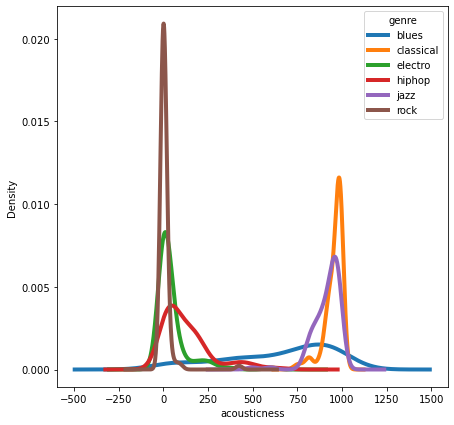

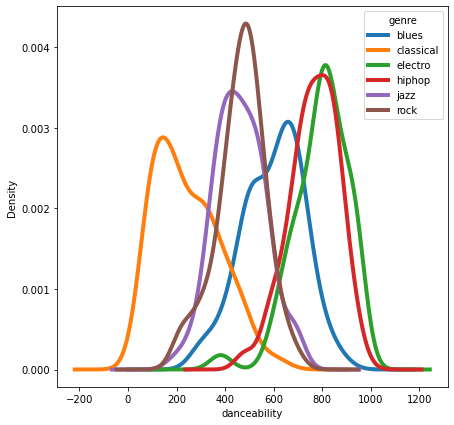

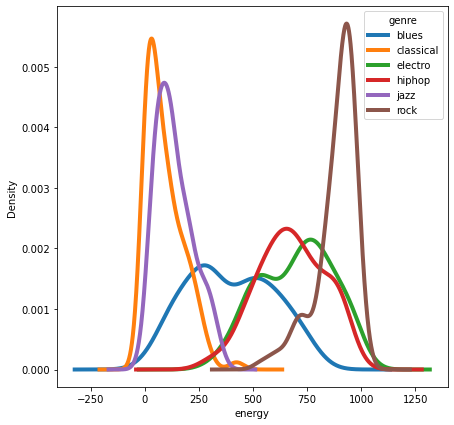

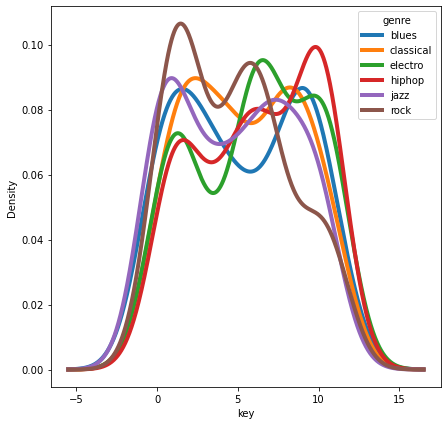

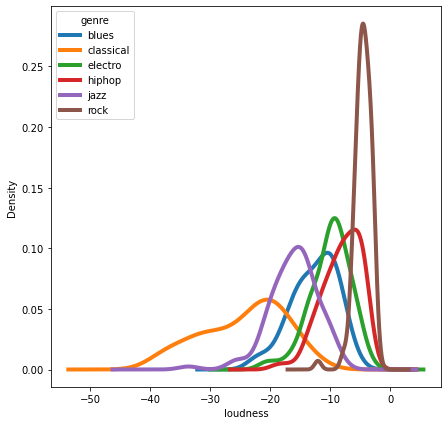

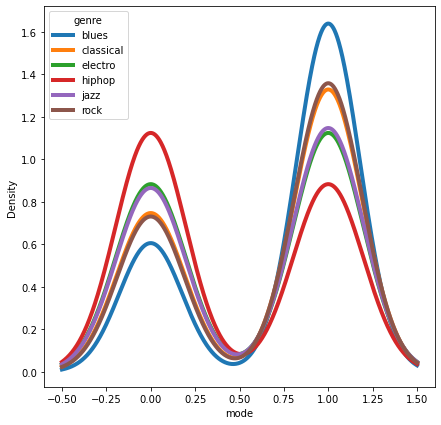

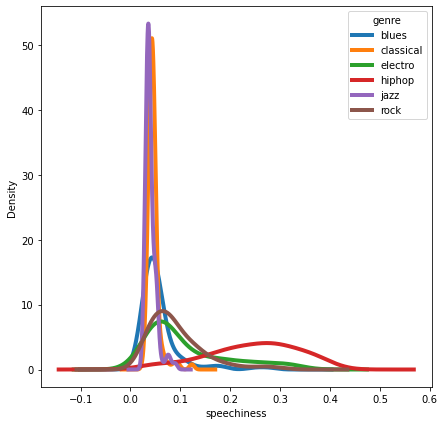

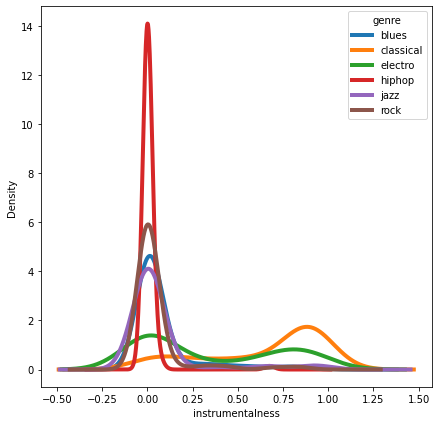

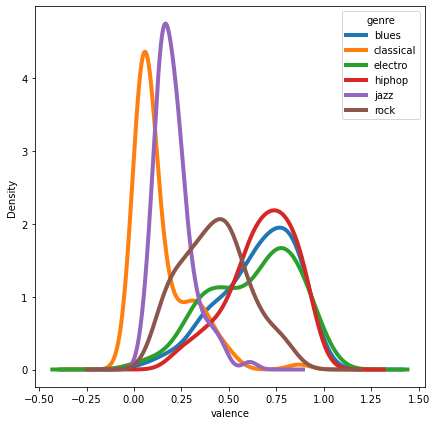

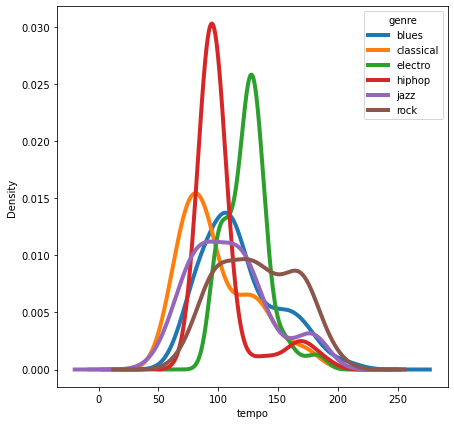

In [18]:
ft = ["acousticness","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","valence","tempo"]

for x in ft:
  temp = final_df.pivot(columns='genre', values=x)
  temp.plot.density(figsize = (7, 7), linewidth = 4)
  plt.xlabel(x)

In [19]:
#using Random forest that gives best accuracy
X=final_df[[ "acousticness","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","valence","tempo"]] # Features
y=final_df['genre']  # Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print('Confusion matrix for Random Forest\n')
print(confusion_matrix(y_test,y_pred ))
print('\n')
print(classification_report(y_test,y_pred ))

print("Accuracy of Random forest:",accuracy_score(y_true = y_test, y_pred=y_pred,)*100,'%\n')

Confusion matrix for Random Forest

[[26  1  0  1  1  0]
 [ 2 17  0  0  1  0]
 [ 0  0 15  3  0  0]
 [ 0  0  0 17  0  1]
 [ 1  3  0  0 11  0]
 [ 0  0  1  0  0 19]]


              precision    recall  f1-score   support

       blues       0.90      0.90      0.90        29
   classical       0.81      0.85      0.83        20
     electro       0.94      0.83      0.88        18
      hiphop       0.81      0.94      0.87        18
        jazz       0.85      0.73      0.79        15
        rock       0.95      0.95      0.95        20

    accuracy                           0.88       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.88      0.88      0.87       120

Accuracy of Random forest: 87.5 %



In [20]:
#screen for audio features manually added
def feature():
    root.destroy()
    f=Tk()
    f.title("Music Genre Classifier")
    f.geometry("500x650")
    f.configure(background='black')
    sp=ImageTk.PhotoImage(Image.open("download.png"))

    Label(f,text="Music Genre Classifier",
        font=('Helvetica',15,'bold'), bg='black',foreground='green', relief='solid').pack(side=TOP)
        # place(x=150,y=100)


    Label(f,image=sp,height=150,width=350, state=NORMAL,bg="black").pack(side='bottom')
    Label(f,text="Acousticness", font=('Helvetica',10,'bold'),bg="black",foreground='green',relief='solid', width=28 ).place(x=40,y=60)
    Label(f,text="Danceability", font=('Helvetica',10,'bold'),bg="black",foreground='green',relief='solid', width=28).place(x=40,y=80)
    Label(f,text="Energy", font=('Helvetica',10,'bold'),bg="black",foreground='green',relief='solid', width=28).place(x=40,y=100)
    Label(f,text="Key", font=('Helvetica',10,'bold'),bg="black",foreground='green',relief='solid', width=28).place(x=40,y=120)
    Label(f,text="Loudness", font=('Helvetica',10,'bold'),bg="black",foreground='green',relief='solid', width=28).place(x=40,y=140)
    Label(f,text="Mode", font=('Helvetica',10,'bold'),bg="black",relief='solid',foreground='green', width=28).place(x=40,y=160)
    Label(f,text="Speechiness", font=('Helvetica',10,'bold'),bg="black",foreground='green',relief='solid', width=28).place(x=40,y=180)
    Label(f,text="Instrumentalness", font=('Helvetica',10,'bold'),bg="black",foreground='green',relief='solid', width=28).place(x=40,y=200)
    Label(f,text="Valence", font=('Helvetica',10,'bold'),bg="black",relief='solid',foreground='green', width=28).place(x=40,y=220)
    Label(f,text="Tempo", font=('Helvetica',10,'bold'),bg="black",relief='solid', foreground='green',width=28).place(x=40,y=240)
    Label(f,text="Predicted Result is", font=('Helvetica',10,'bold'),bg="black",relief='solid',foreground='green', width=28).place(x=40,y=280)

    acousticness=StringVar()
    energy=StringVar()
    key=StringVar()
    mode=StringVar()
    loudness=StringVar()
    valence=StringVar()
    tempo=StringVar()
    instrumentalness=StringVar()
    speechiness=StringVar()
    danceability=StringVar()



    Entry(f, text=acousticness,width=20).place(x=320,y=60)
    Entry(f, text=danceability,width=20).place(x=320,y=80)
    Entry(f, text=energy,width=20).place(x=320,y=100)
    Entry(f, text=key,width=20).place(x=320,y=120)
    Entry(f, text=loudness,width=20).place(x=320,y=140)
    Entry(f, text=mode,width=20).place(x=320,y=160)
    Entry(f, text=speechiness,width=20).place(x=320,y=180)
    Entry(f, text=instrumentalness,width=20).place(x=320,y=200)
    Entry(f, text=valence,width=20).place(x=320,y=220)
    Entry(f, text=tempo,width=20).place(x=320,y=240)


    def info():
        n=Tk()
        S =Scrollbar(n)
        n.title("Music Features")
        T = Text(n, height=4, width=50, background='black', wrap = WORD)
        S.pack(side=RIGHT, fill=Y)
        T.pack(side=LEFT, fill=Y)
        S.config(command=T.yview)
        T.config(yscrollcommand=S.set,foreground='green' ,font=('Arial', 12, ))
        n.geometry("410x450")
        n.configure(background='#1A1A1A')
        dets = """->valence: Data type(number:float)\nA measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
                \r\n->tempo: Data type(number:float)\n\rThe overall estimated tempo of a track in beats per minute (BPM).In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
                \r\n->speechiness: Data type(number:float)\n\rSpeechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
                \r\n->mode:Data type(int)\n\rMode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
                \r\n->loudness: Data type(number:float)\n\rThe overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
                \r\n->acousticness: Data type(number:float)\n\rA confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
                \r\n->danceability: Data type(number:float)\n\rDanceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
                \r\n->energy: Data type(number:float)\n\rEnergy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
                \r\n->instrumentalnessData type(number:float)\n\rPredicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
                \r\n->key:Data type(int)\n\rThe key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0=C, 1=C♯/D♭, 2=D, and so on. If no key was detected, the value is -1.
                """

        T.insert(END,dets)
        n.mainloop()
              



    Button(f,text='Feature Details',width=15,command=info,bg='black', foreground='green').place(x=160, y=400)

   
		
    def model():
        result = clf.predict([[1000*float(acousticness.get()),1000*float(danceability.get()),1000*float(energy.get()),int(key.get()),float(loudness.get()),int(mode.get()),float(speechiness.get()),float(instrumentalness.get()),float(valence.get()),float(tempo.get())]])
        Label(f,text=result,font=('Helvetica',10,'bold'),bg="black", foreground='green', relief='solid', width=18).place(x=300,y=280)



    Button(f,text='Prediction',width=15,command=model,bg='black', foreground='green').place(x=320, y=400)
    Button(f,text='Quit',width=15,command=f.destroy, bg='black', foreground='green').place(x=320, y=430)

    f.resizable(0,0)
    f.mainloop()
    





In [21]:
#screen for audio link
def link():
    root.destroy()
    l=Tk()
    l.title("Music Genre Classifier")
    l.geometry("400x350")
    l.configure(background='black')
    lsp=ImageTk.PhotoImage(Image.open("download.png"))
    Label(l,text="Music Classifier",
        font=('Helvetica',15,'bold'), bg='black',foreground='green', relief='solid').place(x=65,y=40)
    Label(l,image=lsp,height=150,width=350, state=NORMAL,bg="black").pack(side='bottom')
    Label(l,text="Enter the link:", font=('Helvetica',10,'bold'),bg="black",foreground='green',relief='solid', width=20 ).place(x=3,y=85)
    linksp=StringVar()
    Entry(l, text=linksp,width=40).place(x=150,y=85)
    Label(l,text="Predicted Result:", font=('Helvetica',10,'bold'),bg="black",relief='solid',foreground='green', width=20).place(x=0,y=120)
   
    def model():
         playlist_link =linksp.get()
         playlist_URI = playlist_link.split("/")[-1].split("?")[0]
         song=sp.audio_features(playlist_URI)[0]
         acousticness=song.get('acousticness')*1000
         key=song.get('key')
         instrumentalness=song.get('instrumentalness')
         speechiness=song.get('speechiness')
         loudness=song.get('loudness')
         danceability=song.get('danceability')*1000
         valence=song.get('valence')
         mode=song.get('mode')
         energy=song.get('energy')*1000
         tempo=song.get('tempo')
         result = clf.predict([[acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,valence,tempo]])
         Label(l,text=result, font=('Helvetica',10,'bold'), bg='white',foreground='green', relief='solid').place(x=150, y=120)



    Button(l,text='Prediction',width=15,command=model,bg='black', foreground='green').place(x=180, y=180)
    Button(l,text='Quit',width=15,command=l.destroy, bg='black', foreground='green').place(x=180, y=210)

   
    l.resizable(0,0)
    l.mainloop()



In [22]:
#main screen
root = Tk()
root.title("Music Genre Classifier")
root.geometry("400x350")
root.configure(background='black')
logo=ImageTk.PhotoImage(Image.open("download.png"))
Label(root,text="Music Genre Classifier",font=('Helvetica',15,'bold'), bg='black',foreground='green', relief='solid').place(x=80,y=60)
Label(root,image=logo,height=150,width=350, state=NORMAL,bg="black").pack(side='bottom')
R1 = Radiobutton(root, text="Predict using Spotify link", value=1,command=link)
R1.place(x=40,y=120)
R1.config(bg="black", foreground="green", font=('Helvetica',15,'bold'))
R2 = Radiobutton(root, text="Predict using audio features", value=2, command=feature)
R2.place(x=40,y=160)
R2.config(bg='black', foreground='green',font=('Helvetica',15,'bold'))
Button(root,text='Quit',width=5,command=root.destroy, bg='black', foreground='green').place(x=320,y=220)
root.resizable(0,0)
root.mainloop()

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: Us